---
# Assignment Dataprocessing HT25
---
(a) Use the `pd.read_csv()` function to read the data into Python. Call the
loaded data ``college``. Make sure that you have the directory set to the correct
location for the data.

In [3]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
college = pd.read_csv('/home/emicr/-python-programming-Altobelli-Matteo/DataBehandling/Labb/College.csv')

(b) Look at the data used in the notebook by creating and running a new cell
with just the code college in it. You should notice that the first column is just
the name of each university in column named something like ``Unnamed: 0``. We
don’t really want pandas to treat this as data. However, it may be handy to
have these names for later. Try the following commands and similarly look at
the resulting data frames:
```python
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)  
college3 = college3.set_index('College')
```

This has used the first column in the file as an index for the data frame. This
means that pandas has given each row a name corresponding to the appropriate
university. Now you should see that the first data column is ``Private``. Note
that the names of the colleges appear on the left of the table. Overwrite your
modified version to the data with the following: ``college = college3``

In [6]:
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)  
college3 = college3.set_index('College')

college = college3

(c) Use the `describe()` method of `college` to produce a numerical summary of the variables in the data set.

In [ ]:
college.describe()

(d) Use the ``pd.plotting.scatter_matrix()`` function to produce a ``scatterplot``
matrix of the first columns ``[Top10perc, Apps, Enroll]``. Recall that you can
reference a list C of columns of a data frame ``A`` using ``A[C]``.

In [ ]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

(e) Use the ``boxplot()`` method of ``college`` to produce side-by-side boxplots of
``Outstate`` versus ``Private``.

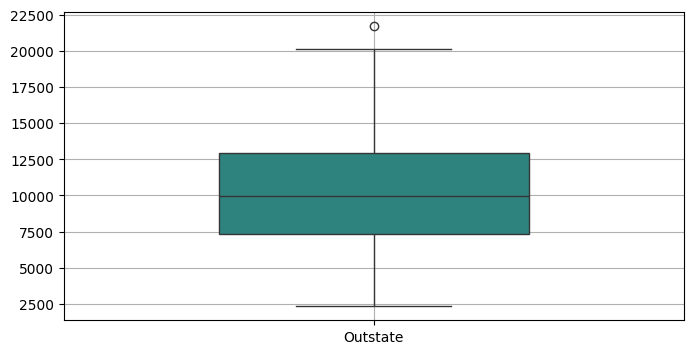

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=college[['Outstate', 'Private']], palette='viridis', width=0.5)
plt.grid(True)

(f) Create a new qualitative (yes/no) variable, called ``Elite``, by binning the
``Top10perc`` variable into two groups based on whether or not the proportion of
students coming from the ``top 10%`` of their high school classes exceeds ``50%``.
```python
1 college [ ’ Elite ’] = pd . cut ( college [ ’ Top10perc ’] , [0 ,0.5 ,1] , labels
=[ ’ No ’ , ’Yes ’])
```
Use the ``value_counts()`` method of ``college[’Elite’]`` to see how many elite
universities there are. Finally, use the ``boxplot()`` method again to produce
side-by-side boxplots of ``Outstate`` versus ``Elite``.

Elite
No     699
Yes     78
Name: count, dtype: int64


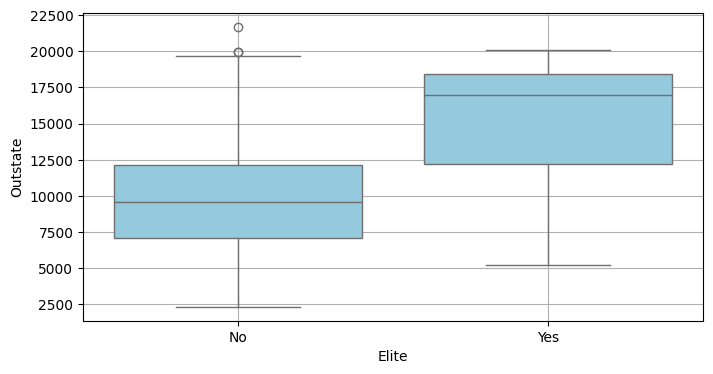

In [9]:
college['Elite'] = pd.cut(college['Top10perc'] / 100, [0, 0.5, 1], labels=['No', 'Yes'])
print(college['Elite'].value_counts())

plt.figure(figsize=(8, 4))
sns.boxplot(x='Elite', y='Outstate', data=college,  color='skyblue')
plt.grid(True)
plt.show()

(g) Use the ``plot.hist()`` method of college to produce some histograms with
differing numbers of bins for a few of the quantitative variables. The command
``plt.subplots(2, 2)`` may be useful: it will divide the plot window into four re-
gions so that four plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

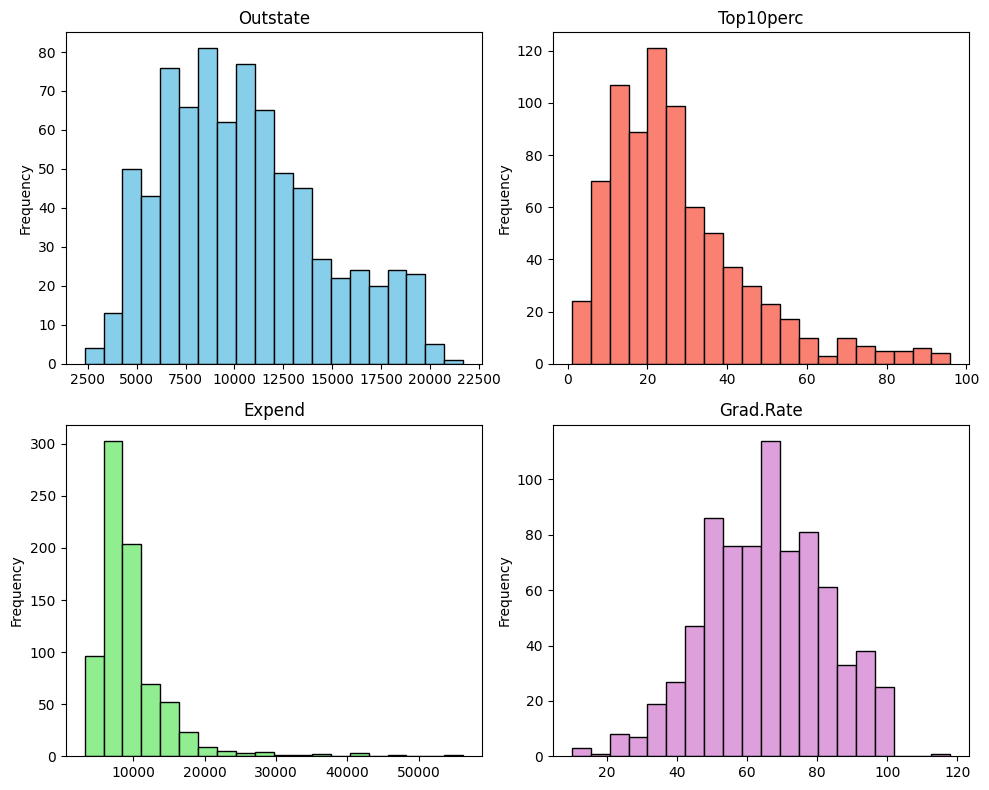

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

college['Outstate'].plot.hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black', title='Outstate')
college['Top10perc'].plot.hist(ax=axes[0, 1], bins=20, color='salmon', edgecolor='black', title='Top10perc')
college['Expend'].plot.hist(ax=axes[1, 0], bins=20, color='lightgreen', edgecolor='black', title='Expend')
college['Grad.Rate'].plot.hist(ax=axes[1, 1], bins=20, color='plum', edgecolor='black', title='Grad.Rate')

plt.tight_layout()
plt.show()


(h) Continue exploring the data, and provide a brief summary of what you
discover. Describe what you are looking for and what you find. For example,
are there any correlations between personal spending, instructional spending
and Elite status?

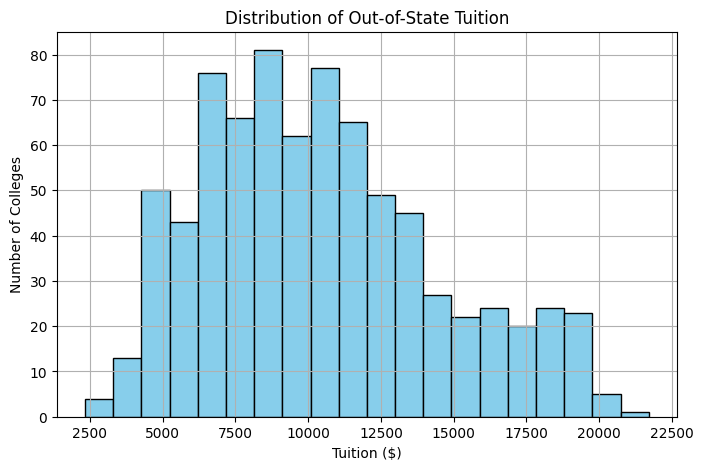

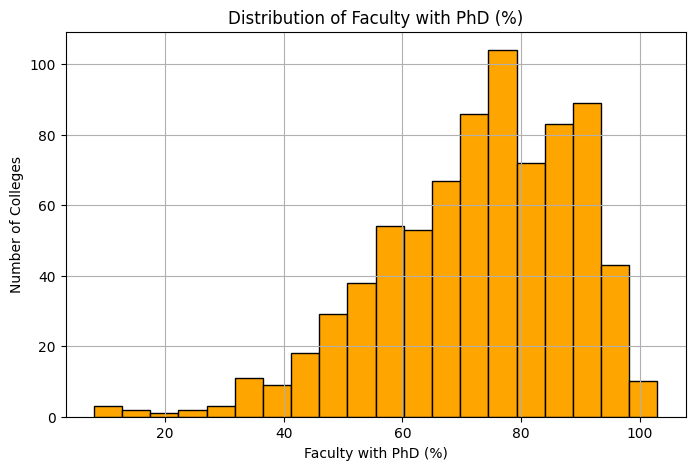

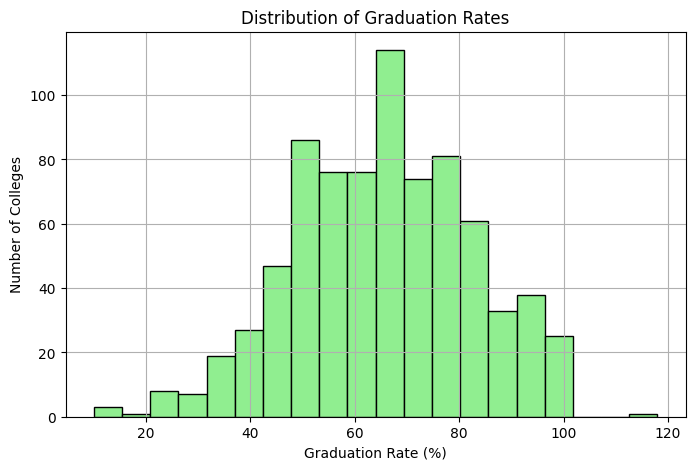

In [ ]:
# Cost vs Quality — Out-of-state tuition
plt.figure(figsize=(8, 5))
college['Outstate'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Out-of-State Tuition')
plt.xlabel('Tuition ($)')
plt.ylabel('Number of Colleges')
plt.grid(True)
plt.show()
## It looks like the majority of out of state college are more expensive,
## suggesting that more expensive institutions may be private or offer higher-quality education.

# Faculty vs Outcomes — % of faculty with PhD
plt.figure(figsize=(8, 5))
college['PhD'].plot.hist(bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Faculty with PhD (%)')
plt.xlabel('Faculty with PhD (%)')
plt.ylabel('Number of Colleges')
plt.grid(True)
plt.show()
## The distribution of PhD percentages is skewed, which might means that
## the majority of students ends up with a PhD after their studies.


# Selectivity vs Enrollment — Graduation Rate
plt.figure(figsize=(8, 5))
college['Grad.Rate'].plot.hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Number of Colleges')
plt.grid(True)
plt.show()

## The graduation rates are pretty evenly distributed, with one outlier.
## Most colleges have graduation rates between 60% and 70%.
